In [3]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("./sp500.csv", index_col=0, parse_dates=True)

In [5]:
close = data.close.dropna()
close

date
1988-01-04     256.01
1988-01-05     258.77
1988-01-06     259.03
1988-01-07     261.21
1988-01-08     243.54
               ...   
2019-12-16    6470.03
2019-12-17    6472.24
2019-12-18    6470.00
2019-12-19    6499.26
2019-12-20    6531.75
Name: close, Length: 8062, dtype: float64

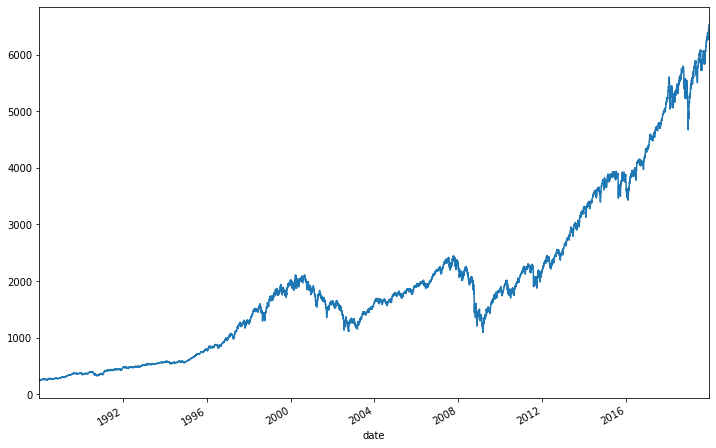

In [6]:
fig, ax = plt.subplots()
close.plot(ax=ax, figsize=(12,8))
plt.show()

In [7]:
close_adf = adfuller(close)
close_adf

(2.9381312624627745,
 1.0,
 19,
 8042,
 {'1%': -3.4311634031982003,
  '5%': -2.861899466190631,
  '10%': -2.566961339130965},
 73094.11227987407)

In [64]:
close1d = close.diff(1).dropna()
close1dpc = (close.shift(1)/close).dropna()
closelog = np.log(close/close.shift(1)).dropna()

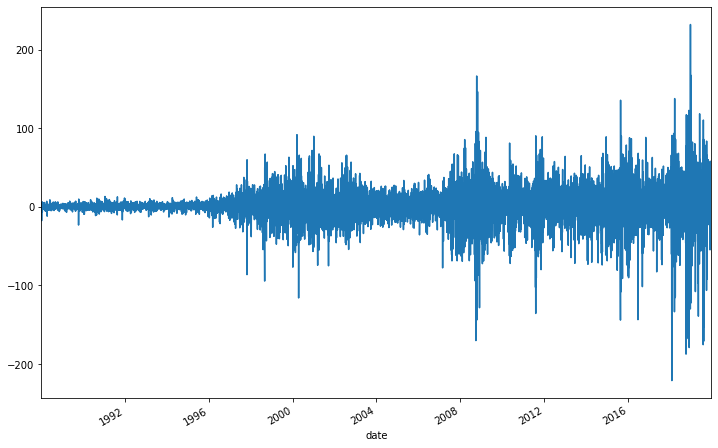

In [65]:
fig, ax = plt.subplots()
close1d.plot(ax=ax, figsize=(12,8))
plt.show()

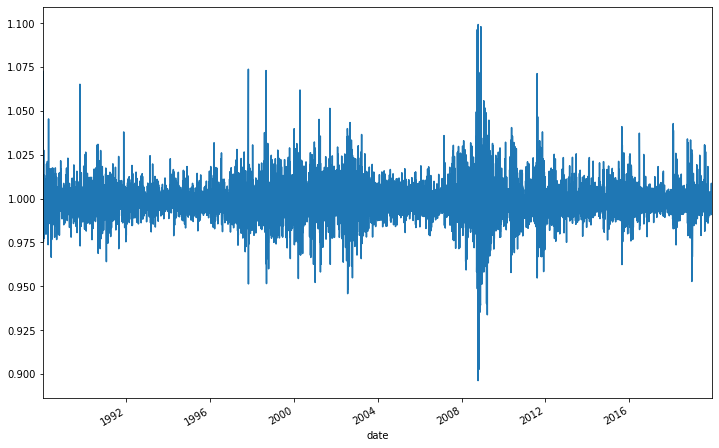

In [10]:
fig, ax = plt.subplots()
close1dpc.plot(ax=ax, figsize=(12,8))
plt.show()

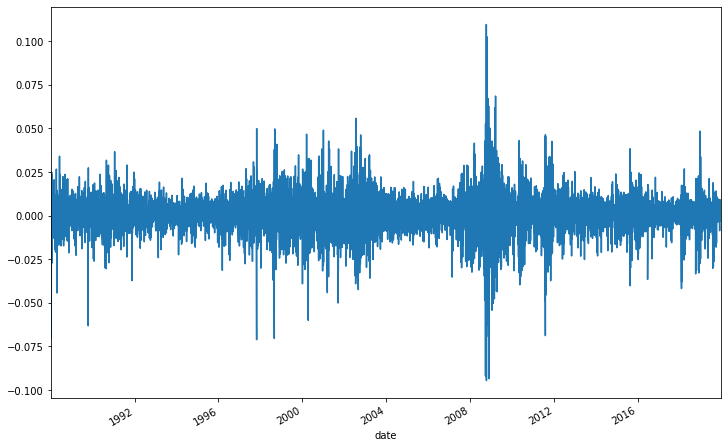

In [11]:
fig, ax = plt.subplots()
closelog.plot(ax=ax, figsize=(12,8))
plt.show()

In [12]:
close1d_adf = adfuller(close1d)
close1dpc_adf = adfuller(close1dpc)
closelog_adf = adfuller(closelog)

In [13]:
close1d_adf

(-21.795194304871256,
 0.0,
 16,
 8044,
 {'1%': -3.4311632008951203,
  '5%': -2.8618993767993346,
  '10%': -2.566961291547038},
 73092.26380494033)

In [14]:
close1dpc_adf

(-15.727124805501255,
 1.3027154788300251e-28,
 33,
 8027,
 {'1%': -3.4311649236856896,
  '5%': -2.861900138045498,
  '10%': -2.566961696766406},
 -49850.19703239634)

In [15]:
closelog_adf

(-16.042836440171236,
 5.888278553716681e-29,
 33,
 8027,
 {'1%': -3.4311649236856896,
  '5%': -2.861900138045498,
  '10%': -2.566961696766406},
 -49878.85358541975)

In [66]:
close1d_arma = SARIMAX(close1d, order=(2, 0, 2))
close1d_fit = close1d_arma.fit()

In [67]:
close1d_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  close   No. Observations:                 8061
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -36723.807
Date:                Fri, 10 Jan 2020   AIC                          73457.614
Time:                        14:22:02   BIC                          73492.588
Sample:                             0   HQIC                         73469.581
                               - 8061                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0785      0.220     -0.357      0.721      -0.510       0.352
ar.L2          0.4255      0.163      2.616      0.009       0.107       0.744
ma.L1          0.0378      0.219      0.173      0.863      -0.391       0.466
ma.L2         -0.4683      0.169     -2.778      0.005      -0.799      -0.138
sigma2       530.3707      3.325    159.514      0.000     523.854     536.887
===================================================================================
Ljung-Box (Q):                      107.26   Jarque-Bera (JB):             42124.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.45   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
osf = close1d_fit.get_prediction(start=-30)
osf_close1d_forecast = osf.predicted_mean
osf_ci = osf.conf_int()
osf_lci = osf_ci.loc[:,"lower close"]
osf_uci = osf_ci.loc[:,"upper close"]
osf_close1d_forecast

date
2019-11-08   -1.778122
2019-11-11   -2.237387
2019-11-12   -0.980063
2019-11-13   -0.895597
2019-11-14   -1.047463
2019-11-15   -0.858128
2019-11-18   -2.758596
2019-11-19   -2.541685
2019-11-20   -1.199425
2019-11-21   -0.085686
2019-11-22    0.793923
2019-11-25   -0.219941
2019-11-26   -2.163115
2019-11-27   -2.650155
2019-11-29   -2.627601
2019-12-02   -1.324919
2019-12-03    2.081069
2019-12-04    3.336680
2019-12-05    0.991899
2019-12-06   -0.654049
2019-12-09   -2.351535
2019-12-10   -1.900735
2019-12-11    0.085796
2019-12-12   -1.358494
2019-12-13   -2.961167
2019-12-16   -2.964055
2019-12-17   -3.219042
2019-12-18   -3.329213
2019-12-19   -1.385092
2019-12-20   -2.602118
dtype: float64

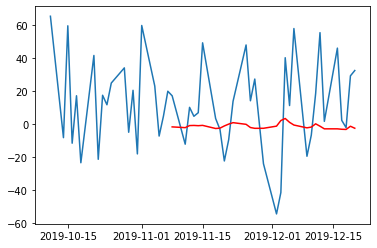

In [69]:
_ = plt.figure()
_ = plt.plot(close1d.index[-50:],  close1d[-50:], label="observed")
_ = plt.plot(osf_close1d_forecast.index, osf_close1d_forecast.values, color="r", label="forecast")
plt.show()

In [80]:
osf_int_forecast = np.cumsum(osf_close1d_forecast)
close_forecast = osf_int_forecast + close
close_forecast[-50:]

date
2019-10-11            NaN
2019-10-14            NaN
2019-10-15            NaN
2019-10-16            NaN
2019-10-17            NaN
2019-10-18            NaN
2019-10-21            NaN
2019-10-22            NaN
2019-10-23            NaN
2019-10-24            NaN
2019-10-25            NaN
2019-10-28            NaN
2019-10-29            NaN
2019-10-30            NaN
2019-10-31            NaN
2019-11-01            NaN
2019-11-04            NaN
2019-11-05            NaN
2019-11-06            NaN
2019-11-07            NaN
2019-11-08    6254.331878
2019-11-11    6239.794491
2019-11-12    6248.914428
2019-11-13    6252.688832
2019-11-14    6258.481369
2019-11-15    6306.943241
2019-11-18    6307.464644
2019-11-19    6301.562960
2019-11-20    6277.873535
2019-11-21    6268.207849
2019-11-22    6282.751772
2019-11-25    6330.551831
2019-11-26    6342.488716
2019-11-27    6367.138561
2019-11-29    6340.310961
2019-12-02    6284.306042
2019-12-03    6244.727110
2019-12-04    6288.333790
2019-12

In [76]:
close_arima = SARIMAX(close, order=(2, 1, 2))
close_arima_fit = close_arima.fit()

In [77]:
osf_arima = close_arima_fit.get_prediction(start=-30)
osf_close_forecast = osf_arima.predicted_mean
osf_close_forecast

date
2019-11-08    6237.214380
2019-11-11    6253.875874
2019-11-12    6242.834370
2019-11-13    6253.018951
2019-11-14    6257.535374
2019-11-15    6264.564500
2019-11-18    6311.979690
2019-11-19    6315.479073
2019-11-20    6313.464312
2019-11-21    6292.091044
2019-11-22    6283.388928
2019-11-25    6296.122382
2019-11-26    6342.192916
2019-11-27    6355.808584
2019-11-29    6383.131000
2019-12-02    6360.240369
2019-12-03    6308.970140
2019-12-04    6268.566852
2019-12-05    6306.480057
2019-12-06    6316.033058
2019-12-09    6372.340085
2019-12-10    6353.169406
2019-12-11    6348.396606
2019-12-12    6365.483633
2019-12-13    6419.383074
2019-12-16    6420.967552
2019-12-17    6466.808517
2019-12-18    6468.915102
2019-12-19    6468.618671
2019-12-20    6496.662964
dtype: float64

## Generating ARMA Data (Appendix)

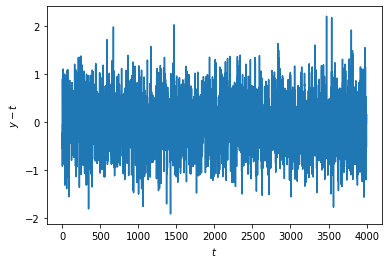

In [16]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# set the ARMA model coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# generate time-series data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=4000, sigma=0.5)

# plot the time-series
plt.plot(y)
plt.ylabel(r"$y-t$")
plt.xlabel(r"$t$")
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(y, order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 4000
Model:                     ARMA(1, 2)   Log Likelihood               -2900.439
Method:                       css-mle   S.D. of innovations              0.500
Date:                Wed, 08 Jan 2020   AIC                           5810.878
Time:                        11:12:29   BIC                           5842.348
Sample:                             0   HQIC                          5822.033
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0205      0.011     -1.852      0.064      -0.042       0.001
ar.L1.y       -0.2488      0.036     -6.954      0.000      -0.319      -0.179
ma.L1.y        0.3291      0.033     10.077      0.000       0.265       0.393
ma.L2.y        0.4227      0.014     29.467      0.000       0.395       0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.0186           +0.0000j            4.0186            0.5000
MA.1           -0.3893           -1.4880j            1.5381           -0.2907
MA.2           -0.3893           +1.4880j            1.5381            0.2907
-----------------------------------------------------------------------------
"""